# LOGISCTIC REGRESSION

In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


In [56]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [57]:
df.loc[df['Gender']=='Male','Gender'] = 1
df.loc[df['Gender']=='Female','Gender'] = 0
df=df.drop('User ID',axis = 1)
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [58]:
row = df.shape[0]
x_train = np.array(df.iloc[:math.ceil(0.7*row),:3])     #Dividing Data set into Training (70%) and testing (30%)
x_test = np.array(df.iloc[math.ceil(0.7*row):,:3])

m_train , n_train = x_train.shape             #Train data set : x_train: 280 X 3      y_train: 280 X 1
m_test , n_test = x_test.shape                #Test  data set : x_test : 120 X 3      y_test : 120 X 1 

print('Train: ',m_train,',',n_train)
print('Test: ',m_test,',',n_test)
x_train

Train:  280 , 3
Test:  120 , 3


array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       [0, 27, 57000],
       [1, 19, 76000],
       [1, 27, 58000],
       [0, 27, 84000],
       [0, 32, 150000],
       [1, 25, 33000],
       [0, 35, 65000],
       [0, 26, 80000],
       [0, 26, 52000],
       [1, 20, 86000],
       [1, 32, 18000],
       [1, 18, 82000],
       [1, 29, 80000],
       [1, 47, 25000],
       [1, 45, 26000],
       [1, 46, 28000],
       [0, 48, 29000],
       [1, 45, 22000],
       [0, 47, 49000],
       [1, 48, 41000],
       [0, 45, 22000],
       [1, 46, 23000],
       [1, 47, 20000],
       [1, 49, 28000],
       [0, 47, 30000],
       [1, 29, 43000],
       [1, 31, 18000],
       [1, 31, 74000],
       [0, 27, 137000],
       [0, 21, 16000],
       [0, 28, 44000],
       [1, 27, 90000],
       [1, 35, 27000],
       [0, 33, 28000],
       [1, 30, 49000],
       [0, 26, 72000],
       [0, 27, 31000],
       [0, 27, 17000],
       [0, 33, 51000],
       [1, 35, 108000],
       [

In [59]:
y_train = np.array(df.iloc[:math.ceil(0.7*row),3])
y_test = np.array(df.iloc[math.ceil(0.7*row):,3])
y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

## From Scratch: By Python (Without Normalisation)

In [60]:
def sigmoid(w,b,x):
    z = np.dot(w,x)+b
    return 1 / (1 + np.exp(-z))

In [61]:
def comp_cost(w,b,x,y,m):
    cost=0
    for i in range(m):
        z = sigmoid(w,b,x[i])
        if y[i]==0:
            cost += - np.log(1 - z)
        else:
            cost += -np.log(z) 
        
    cost /= m
    return cost

In [62]:
def comp_grad(w,b,x,y,m):
    dj_dw = np.zeros(n_train)
    dj_db = 0
    for i in range(m):
        err = sigmoid(w,b,x[i]) - y[i]
        for j in range(n_train):
            dj_dw[j] += err * x[i][j]
        dj_db += err
    dj_dw/= m
    dj_db/= m
    return dj_dw,dj_db

In [63]:
def grad_disc(w,b,x,y,alpha,max_iter,m):
    for i in range(max_iter):
        dj_dw , dj_db = comp_grad(w,b,x,y,m)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i%100==0:
            print(f'Iter: {i} Cost: {comp_cost(w,b,x,y,m)} w: {w} b: {b}')
        
    return w,b

In [64]:
w_init = np.ones(n_train)*0.0001
b_init = 1
w_final , b_final = grad_disc(w_init,b_init,x_train,y_train,1e-9,1000,m_train)
print(w_final,b_final)

Iter: 0 Cost: 3.2617371700518043 w: [9.99996226e-05 9.99766526e-05 5.57548858e-05] b: 0.999999999254855
Iter: 100 Cost: 0.8142909574290417 w: [ 9.99885552e-05  9.95996374e-05 -1.96196815e-05] b: 0.9999999803796057
Iter: 200 Cost: 0.8142897667214557 w: [ 9.99779238e-05  9.92552027e-05 -1.96195287e-05] b: 0.9999999624241223
Iter: 300 Cost: 0.8142885760283941 w: [ 9.99672925e-05  9.89107700e-05 -1.96193758e-05] b: 0.9999999444686836
Iter: 400 Cost: 0.8142873853498552 w: [ 9.99566611e-05  9.85663394e-05 -1.96192230e-05] b: 0.9999999265132897
Iter: 500 Cost: 0.8142861946858408 w: [ 9.99460299e-05  9.82219110e-05 -1.96190701e-05] b: 0.9999999085579406
Iter: 600 Cost: 0.8142850040363493 w: [ 9.99353986e-05  9.78774846e-05 -1.96189173e-05] b: 0.9999998906026363
Iter: 700 Cost: 0.8142838134013821 w: [ 9.99247673e-05  9.75330604e-05 -1.96187645e-05] b: 0.9999998726473767
Iter: 800 Cost: 0.8142826227809371 w: [ 9.99141361e-05  9.71886382e-05 -1.96186116e-05] b: 0.9999998546921618
Iter: 900 Cost: 

In [65]:
def comp_pred(w_f,b_f,x,m):
    predicted = np.ones(m)
    for i in range(m):
        s = sigmoid(w_f,b_f,x[i])
        if s<=0.5: predicted[i] = 0
    return predicted

In [66]:
def accuracy(y1,y2):
    s = y1.size
    acc = 0
    for i in range(s):
        if y1[i] == y2[i]:
            acc+=1
    acc = acc*100 / s
    return acc

In [67]:
y_pred = comp_pred(w_final,b_final,x_test,m_test)
accuracy(y_pred,y_test)

59.166666666666664

## From skratch:By Python (With Normalisation)

In [68]:
x_train_n = (x_train - np.mean(x_train)) / (np.max(x_train) - np.min(x_train))
x_test_n=(x_test - np.mean(x_test)) / (np.max(x_test) - np.min(x_test))

In [69]:
y_pred_n = comp_pred(w_final,b_final,x_test_n,m_test)
accuracy(y_pred_n,y_test)

61.666666666666664

## From skratch: By Python (With standardistaion)

In [70]:
x_train_s = (x_train - np.mean(x_train) ) / np.std(x_train)
x_test_s = (x_test - np.mean(x_test)) / np.std(x_test)

In [71]:
y_pred_s = comp_pred(w_final,b_final,x_test_s,m_test)
accuracy(y_pred_s,y_test)

61.666666666666664

## Logistic Regression using sklearn

In [72]:
df = pd.read_csv('Social_Network_Ads.csv')
df = df.drop('User ID',axis=1)    #User ID may have no impact on Purchase
df.loc[df['Gender']=='Female','Gender'] = 0
df.loc[df['Gender']=='Male', 'Gender'] = 1
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [73]:
x = df.iloc[:,:3]     # 400 X 3
y = df.iloc[:,3:]     # 400 X 1
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr_model = LogisticRegression()

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(f'X_train: {x_train.shape} X_test: {x_test.shape} y_train: {y_train.shape} y_test: {y_test.shape}')

X_train: (280, 3) X_test: (120, 3) y_train: (280, 1) y_test: (120, 1)


In [76]:
lr_model.fit(x_train,y_train)
lr_model.predict(x_test)
lr_model.score(x_test,y_test)*100

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


60.0

## By sklearn : with Normalization

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [78]:
lr_model.fit(x_train_norm,y_train)
lr_model.predict(x_test_norm)
lr_model.score(x_test_n,y_test)*100

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


60.0

#                                 NEAREST NEIGHBOUR CLASSIFICATION

## Ploting Data

In [79]:
df = pd.read_csv('Iris.csv')
df['Sepal_ar'] = df['SepalLengthCm']*df['SepalWidthCm']
df['Petal_ar'] = df['PetalLengthCm']*df['PetalWidthCm']
df = df.drop(columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Id'])
df

,Species,Sepal_ar,Petal_ar
0,Iris-setosa,17.85,0.28
1,Iris-setosa,14.70,0.28
2,Iris-setosa,15.04,0.26
3,Iris-setosa,14.26,0.30
4,Iris-setosa,18.00,0.28
...,...,...,...
145,Iris-virginica,20.10,11.96
146,Iris-virginica,15.75,9.50
147,Iris-virginica,19.50,10.40
148,Iris-virginica,21.08,12.42


Text(0, 0.5, 'Petal Area (in sq cm)')

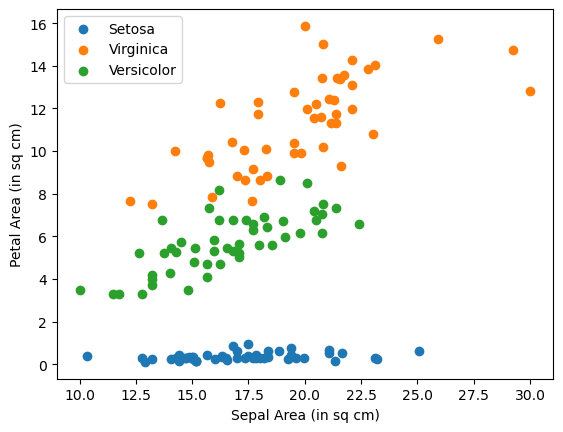

In [80]:
setosa = df.loc[df['Species']=='Iris-setosa']
virginica = df.loc[df['Species']=='Iris-virginica']
versicolor = df.loc[df['Species']=='Iris-versicolor']
plt.scatter(setosa.iloc[:,1:2],setosa.iloc[:,-1],label='Setosa')
plt.scatter(virginica.iloc[:,1:2],virginica.iloc[:,-1],label='Virginica')
plt.scatter(versicolor.iloc[:,1:2],versicolor.iloc[:,-1],label='Versicolor')
plt.legend()
plt.xlabel('Sepal Area (in sq cm)')
plt.ylabel('Petal Area (in sq cm)')

In [81]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [82]:
row = df.shape[0]
data = np.array(df)

In [83]:
rand_indx = np.random.permutation(row)         #random index to divide given data set
train_data = data[rand_indx[:math.ceil(row*0.7)]]  #training data set       
test_data = data[rand_indx[math.ceil(row*0.7):]]   #testing data set

x_train = train_data[:,:5]
y_train = train_data[:,-1]
x_test = test_data[:,:5]
y_test = test_data[:,-1]

In [84]:
print(f'x_train: {x_train.shape} y_train: {y_train.shape}')
print(f'x_test: {x_test.shape} y_test: {y_test.shape}')

x_train: (105, 5) y_train: (105,)
x_test: (45, 5) y_test: (45,)


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [86]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:5],df.iloc[:,-1],test_size=0.3,random_state = 1)    #Spliting data
print(f'x_train: {x_train.shape} y_train: {y_train.shape}')
print(f'x_test: {x_test.shape} y_test: {y_test.shape}')

x_train: (105, 5) y_train: (105,)
x_test: (45, 5) y_test: (45,)


In [88]:
def knn(x_r,y_r,x_s,y_s):
    k_arr = np.arange(20)
    acc = np.zeros(20)
    for i in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_r,y_r)  
        y_pred = neigh.predict(x_s)
        acc[i-1] = accuracy_score(y_s,y_pred)
    return acc , k_arr

Text(0, 0.5, 'Accuracy')

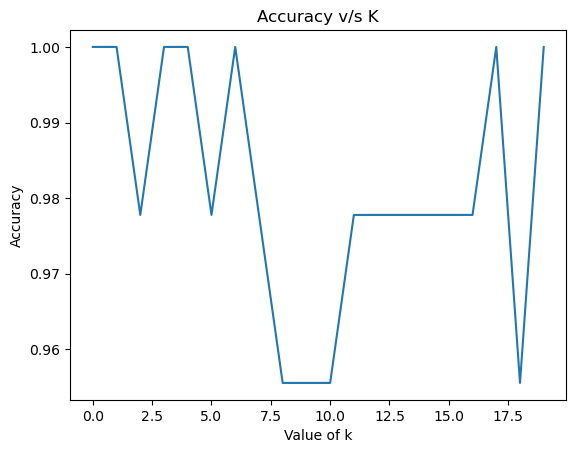

In [89]:
accuracy , k_vec = knn(x_train,y_train,x_test,y_test)
plt.plot(k_vec,accuracy)
plt.title('Accuracy v/s K')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')